In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
############## HELPERS FUNCTION ###############

## DATA CLEAN UP 
def cleanThisUp(df):
    
    col_numeric = 'users'#, 'new_users', 'pageviews', 'unique_pageviews'
    col_text = 'inmarketsegment', 'gender', 'age', 'tag'#, 'sub_category', 'sub_sub_category', 'tag'
    #col_time = 'avg_time_on_page'
    
    #Clean up column names
    df.columns = df.columns.str.lower().str.replace('/', 'per').str.replace('[^A-Za-z\s]+', '').str.replace(' ', '_')

    #Drop duplicates
    df = df.drop_duplicates().reset_index().drop('index', axis=1)


    #Clean up values in numeric types
  #  for num in col_numeric:
  #      df[num] = df[num].astype(str).str.replace(',','').astype(float).astype(int) #change all numeric values to integer

    #Clean up values in string types
    for string in col_text:
        df[string] = df[string].astype(str).str.lower()
        #change all string values to lowercase and standardize spacing

    #Clean up time format
    #all_moms.avg_time_on_page = pd.to_timedelta(all_moms.avg_time_on_page, unit='m') #format duration type
 #   df.avg_time_on_page = pd.to_timedelta(df.avg_time_on_page, unit='m') #format duration type

    #Clean up tag format 
    tag_list = []

    for li in range(len(df.tag)):
         tag_list.append(df.tag[li].split('|'))

    df.tag = tag_list
    
    return df

## DESCRIBE
def tellMeStats(df):
    total_users = np.sum(df.users)
    total_new_users = np.sum(df.new_users)
    total_returning_users = total_users - total_new_users
    total_page_views = np.sum(df.pageviews)
    total_unique_page_views = np.sum(df.unique_pageviews)
    total_time_on_page = np.sum(df.avg_time_on_page)

    print ('Total Users: ', total_users, 
           '\nTotal New Users:', total_new_users,
           '\nTotal Returning Users:', total_returning_users,
           '\nTotal Pageviews: ',  total_page_views,
           '\nTotal Unique Pageviews: ', total_unique_page_views, 
           '\nTotal Duration:', total_time_on_page)

#DESCRIBE GENDER
def tellMeFemaleStats(df): 
    female_users = df[df.gender == 'female']
    female_users_stats = df[df.gender == 'female'].users.sum()
    print('female users: ', female_users_stats, ' which is {}'.format((female_users_stats/df.users.sum())*100), 'of all users')
    return female_users

def tellMeMaleStats(df): 
    male_users = df[df.gender == 'male']
    male_users_stats = df[df.gender == 'male'].users.sum()
    print('male users in: ', male_users_stats, ' which is {}'.format((male_users_stats/df.users.sum())*100), 'of all users')
    return male_users
        
#DESCRIBE AGE
def tellMeAgeStats(df, agegroup): 
    age_group = df[df.age == agegroup]
    age_group_stats = df[df.age == agegroup].users.sum()
    print('Users in their', agegroup, 'totaled to:', age_group_stats, ' which is {}'.format((age_group_stats/df.users.sum())*100), 'of all users')
    return age_group
    
## GET UNIQUE TAGS & Words
def getTags(series):
    tags = [] 
    for list in series:
        for word in list:
            tags.append(word)
            
    return tags #list of tags
        
def getUniqueWords(allWords) :
    uniqueWords = [] 
    for i in allWords:
        if not i in uniqueWords:
            uniqueWords.append(i)
            
    return uniqueWords #series of unique words

# CALCULATE TAG FREQUENCY
def getFreqOut(dataframe):
    total_tags = getTags(dataframe.tag)
    unique_tags = getUniqueWords(total_tags)

    print ('# Tags: ', len(total_tags))
    print ('# Unique Tags: ', len(unique_tags))

    #Count how many times each tag appears on the list
    unique_tags_list, counts = np.unique(total_tags, return_counts=True)
    unique_tag_count = dict(zip(unique_tags_list, counts))

    #Put them to Dataframe
    tag_freq = pd.DataFrame.from_dict(unique_tag_count, orient='index').reset_index()
    tag_freq.columns = ['tags', 'counts']

    #Calculate Tag Frequency
    total_tag_frequency = np.sum(tag_freq.counts)
    tag_freq['tag_freq'] = (tag_freq.counts / total_tag_frequency)

    #Sort them
    tag_freq = tag_freq.sort_values('tag_freq', ascending=False)
    
    return tag_freq #returns dataframe

## ANALYZE BASE USERS

<br>Total Users:  127,584,478 
<br>Total New Users: 9,354,216 
<br>Total Returning Users: 118,230,262 
<br>Total Pageviews:  405,392,436 
<br>Total Unique Pageviews:  352,897,652 
<br>Total Duration: 61309 days 07:59:43.056867

<p># Tags:  2,812,060
<br># Unique Tags:  19,675

In [3]:
insegment_f = pd.read_csv('GA_affinity_export.csv', comment='#').dropna()

In [4]:
insegment_f.columns = 'inmarket_segment', 'gender', 'age', 'tag', 'users'

In [5]:
insegment_f.head()

,inmarket_segment,gender,age,tag,users
0,(other),(other),(other),(other),59737852.0
1,Apparel & Accessories,female,18-24,Fokus Indosiar|Fokus|Video Tsunami Palu|Tsuna...,35.0
2,Apparel & Accessories,female,18-24,Fokus Indosiar|Lion Air Jatuh|Pesawat Lion Ai...,365.0
3,Apparel & Accessories,female,18-24,guru agama cabul|Korban Asusila|Semarang|suar...,55.0
4,Apparel & Accessories,female,18-24,James Coyle|Lord Ivar Mounbatten|Lord Ivar|Ke...,86.0


In [6]:
insegment_f.dtypes

inmarket_segment     object
gender               object
age                  object
tag                  object
users               float64
dtype: object

In [7]:
insegment_f = cleanThisUp(insegment_f)

In [8]:
insegment_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5122071 entries, 0 to 5122070
Data columns (total 5 columns):
inmarketsegment    object
gender             object
age                object
tag                object
users              float64
dtypes: float64(1), object(4)
memory usage: 195.4+ MB


In [9]:
#Group them together! 
grouped_by_segment = insegment_f.groupby('inmarketsegment').users.sum()
grouped_by_segment.index

Index(['(other)', 'apparel & accessories', 'apparel & accessories/activewear',
       'apparel & accessories/costumes', 'apparel & accessories/eyewear',
       'apparel & accessories/eyewear/sunglasses',
       'apparel & accessories/formal wear',
       'apparel & accessories/formal wear/bridal wear',
       'apparel & accessories/formal wear/suits & business attire',
       'apparel & accessories/handbags',
       ...
       'travel/trips by destination/trips to north america/trips to the us/trips to las vegas',
       'travel/trips by destination/trips to north america/trips to the us/trips to nashville',
       'travel/trips by destination/trips to north america/trips to the us/trips to new york city',
       'travel/trips by destination/trips to north america/trips to the us/trips to seattle',
       'travel/trips by destination/trips to north america/trips to the us/trips to washington, d.c.',
       'travel/trips by destination/trips to the middle east & africa',
       'travel/

In [ ]:
all_tag_freq = getFreqOut(insegment_f)
all_tag_freq

In [256]:
all_freq_mean = np.mean(all_tag_freq.tag_freq)
all_freq_mean

5.0825921219817045e-05

## MOMS

In [34]:
#Find out who the moms are! 

mom_by_baby = grouped_by_segment[grouped_by_segment.index.str.contains('baby')]
mom_by_family = grouped_by_segment[grouped_by_segment.index.str.contains('family')]

mom_by_baby,mom_by_family

(inmarketsegment
 baby & children's products/baby & children's apparel/baby & toddler apparel     157160.0
 baby & children's products/baby & children's apparel/children's apparel         328363.0
 baby & children's products/child car seats                                       37698.0
 baby & children's products/childcare & education/childcare                      332714.0
 baby & children's products/childcare & education/early childhood education      248148.0
 baby & children's products/diapers & baby hygiene products                     4709573.0
 baby & children's products/infant & toddler feeding/infant feeding supplies    1003151.0
 baby & children's products/infant & toddler feeding/toddler meals               721331.0
 baby & children's products/strollers & baby carriages                           138931.0
 baby & children's products/toys & games                                         593218.0
 Name: users, dtype: float64, Series([], Name: users, dtype: float64))

In [36]:
all_moms = insegment_f[insegment_f[insegment_f.inmarketsegment.str.contains('baby')].gender == 'female']

In [38]:
#moms_segmented_sum = all_moms.groupby(['sub_category', 'sub_sub_category']).users.sum()
#moms_segmented_sum.sort_values(ascending=False)

In [39]:
#Get Tag Frequency
moms_tag_freq = getFreqOut(all_moms)
moms_tag_freq

# Tags:  206878
# Unique Tags:  11219


,tags,counts,tag_freq
2404,dream.co.id,2338,0.011301
10583,tsunami anyer,2105,0.010175
10597,tsunami selat sunda,1871,0.009044
1461,brilio.net,1469,0.007101
10904,viral,1464,0.007077
4338,jokowi,1420,0.006864
4572,kapanlagi.com,1419,0.006859
6301,merdeka.com,1117,0.005399
5943,manchester united,1053,0.005090
5616,lion air,916,0.004428


In [40]:
mom_freq_mean = np.mean(moms_tag_freq.tag_freq)
mom_freq_mean

8.913450396647527e-05

In [41]:
#Merge mom tag with all tag
moms_tag_table = moms_tag_freq.merge(all_tag_freq, how='right', on='tags').dropna()
moms_tag_table.columns = 'tags', 'count_segmented', 'freq_segmented', 'count_all', 'freq_all'
moms_tag_table

,tags,count_segmented,freq_segmented,count_all,freq_all
0,dream.co.id,2338.0,0.011301,121727,6.428634e-03
1,tsunami anyer,2105.0,0.010175,75349,3.979324e-03
2,tsunami selat sunda,1871.0,0.009044,66991,3.537922e-03
3,brilio.net,1469.0,0.007101,107435,5.673846e-03
4,viral,1464.0,0.007077,87812,4.637518e-03
5,jokowi,1420.0,0.006864,178221,9.412189e-03
6,kapanlagi.com,1419.0,0.006859,89793,4.742139e-03
7,merdeka.com,1117.0,0.005399,161134,8.509792e-03
8,manchester united,1053.0,0.005090,90736,4.791940e-03
9,lion air,916.0,0.004428,103791,5.481400e-03


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


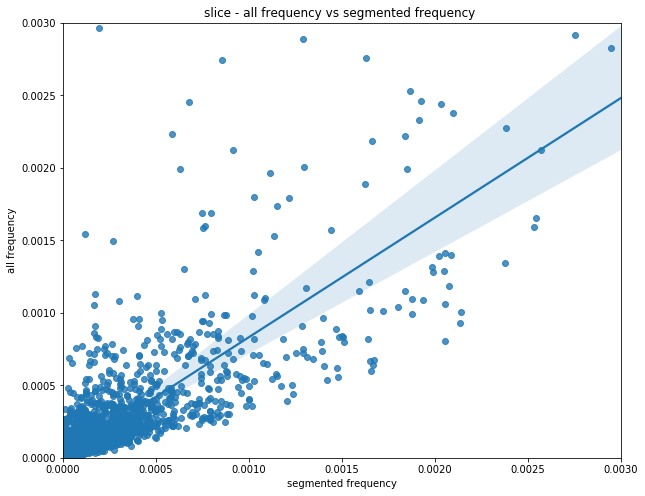

In [42]:
#Maybe we can slice the table to have a better look

x = 'freq_segmented'
y = 'freq_all'

plt.figure(figsize=(10,8))
ax = sns.regplot(x,y, data = moms_tag_table)

plt.title ('slice - all frequency vs segmented frequency ')
plt.xlabel ('segmented frequency')
plt.ylabel ('all frequency')
plt.ylim(bottom = 0, top =0.003)
plt.xlim(left = 0, right=0.003)

plt.show()

In [43]:
#The tags look linearly. Let's find out the Correlation Coefficient (PearsonR)
np.corrcoef(moms_tag_table.freq_all, moms_tag_table.freq_segmented)

array([[1.        , 0.82942973],
       [0.82942973, 1.        ]])

In [44]:
#Let's check spearman correlation
from scipy import stats

mspearmancorr, pvalue = stats.spearmanr(moms_tag_table.freq_all, moms_tag_table.freq_segmented)
mspearmancorr, pvalue

(0.7654365248046928, 0.0)

## Set Threshold to Eliminate Noise

We have a noisy dataset - so to ensure that we have an accurate tag representation, we need to eliminate noise.
We'll define `noise` in the segmented tags as tag that appears very frequently in the population tag. 
Thus to eliminate noise, we need to define what is `very frequently`. 
To make things simple, we will categorize words in two buckets: above average (1) and below average (0) frequency.
Tag in sample tag dataset that appears also the in segmented tag dataset above average frequency will be eliminated. 

In [45]:
#Set threshold above average = noisy. 
all_tag_freq['noise'] = [1 if i >= np.mean(all_tag_freq.tag_freq) else 0 for i in all_tag_freq.tag_freq]
all_noise = all_tag_freq[all_tag_freq.noise == 1].tags.tolist()

In [46]:
moms_tag_table['noise'] = [1 if i in all_noise else 0 for i in moms_tag_table.tags]

In [47]:
mom_signal_table = moms_tag_table[moms_tag_table.noise == 0]
mom_signal_table

,tags,count_segmented,freq_segmented,count_all,freq_all,noise
1746,16 besar liga champions,23.0,0.000111,506,2.672282e-05,0
1772,prabumulih,22.0,0.000106,534,2.820155e-05,0
1790,anak siksa ibu,22.0,0.000106,545,2.878248e-05,0
1877,brebes,21.0,0.000102,497,2.624751e-05,0
1889,kecelakaan maut di bumiayu,21.0,0.000102,534,2.820155e-05,0
1937,kotak suara kardus,21.0,0.000102,413,2.181131e-05,0
1949,tips psikologi,20.0,0.000097,480,2.534971e-05,0
1953,vetsin,20.0,0.000097,526,2.777906e-05,0
1959,anak berbakti,20.0,0.000097,518,2.735656e-05,0
2001,penyedap makanan,20.0,0.000097,526,2.777906e-05,0


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


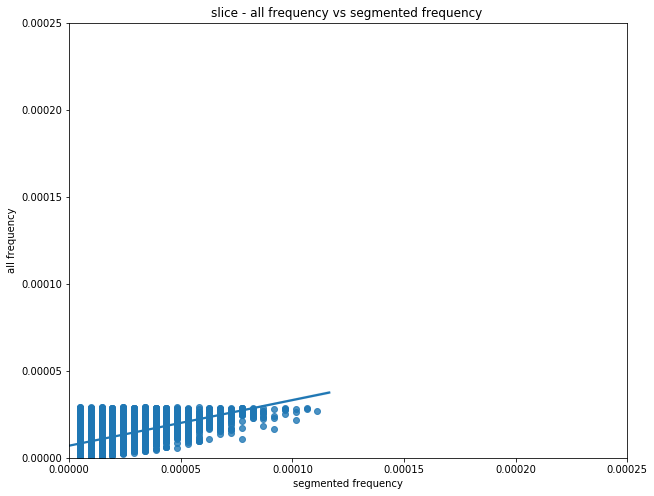

In [48]:
#Maybe we can slice the table to have a better look

x = 'freq_segmented'
y = 'freq_all'

plt.figure(figsize=(10,8))
ax = sns.regplot(x,y, data = mom_signal_table)

plt.title ('slice - all frequency vs segmented frequency ')
plt.xlabel ('segmented frequency')
plt.ylabel ('all frequency')
plt.ylim(bottom = 0, top =0.00025)
plt.xlim(left = 0, right=0.00025)

plt.show()

In [49]:
np.corrcoef(mom_signal_table.freq_all, mom_signal_table.freq_segmented)

array([[1.        , 0.49296414],
       [0.49296414, 1.        ]])

In [50]:
#Let's check spearman correlation
from scipy import stats

mspearmancorr, pvalue = stats.spearmanr(mom_signal_table.freq_all, mom_signal_table.freq_segmented)
mspearmancorr, pvalue

(0.48486915147997117, 0.0)

In [51]:
mom_signal_tags = mom_signal_table.tags.tolist()

In [52]:
len(mom_signal_tags)

6406

In [53]:
#Try using IQR
all_tag_freq_iqr = all_tag_freq.copy()
high_freq, low_freq = np.percentile(all_tag_freq_iqr.tag_freq, [75 ,25])
all_tag_freq_iqr['noise'] = [1 if i >= high_freq else 2 if i <= low_freq else 0 for i in all_tag_freq_iqr.tag_freq]

In [54]:
all_signal = all_tag_freq[all_tag_freq_iqr.noise == 0].tags.tolist()

In [55]:
mom_signal_iqr = []
for i in moms_tag_table.tags:
    if i in all_signal:
        mom_signal_iqr.append(1)
    else:
        mom_signal_iqr.append(0)

In [56]:
moms_tag_table_iqr = moms_tag_table.copy()
moms_tag_table_iqr['signal'] = mom_signal_iqr

In [57]:
mom_signal_table_iqr = moms_tag_table_iqr[moms_tag_table_iqr.signal == 1]
mom_signal_table_iqr

,tags,count_segmented,freq_segmented,count_all,freq_all,noise,signal
2472,liverpool vs mu,16.0,0.000077,207,1.093206e-05,0,1
2620,mourinho dipecat,15.0,0.000073,267,1.410078e-05,0,1
2714,flyover kretek,14.0,0.000068,254,1.341422e-05,0,1
3007,jalan gubeng surabaya ambles,13.0,0.000063,208,1.098487e-05,0,1
3047,penghinaan jokowi,12.0,0.000058,264,1.394234e-05,0,1
3054,bwf world tour finals 2018,12.0,0.000058,219,1.156581e-05,0,1
3089,derry sulaiman,12.0,0.000058,184,9.717389e-06,0,1
3109,reza bukan digugat cerai,12.0,0.000058,182,9.611765e-06,0,1
3110,reza bukan cerai,12.0,0.000058,182,9.611765e-06,0,1
3176,lagu sayur kol,12.0,0.000058,185,9.770201e-06,0,1


In [58]:
len(mom_signal_table_iqr)

3748

In [75]:
207/16, 49/3

(12.9375, 16.333333333333332)

In [71]:
mom_signal_table_iqr[mom_signal_table_iqr.tags == 'anak tidur']

,tags,count_segmented,freq_segmented,count_all,freq_all,noise,signal
7777,anak tidur,3.0,0.000015,49,0.000003,0,1


In [59]:
top_mom_tags = mom_signal_table_iqr.tags[:18].tolist()

In [61]:
genword = 'bumiayu'
top_mom_tags_cleaned = [x for x in top_mom_tags if genword not in x]
top_mom_tags_cleaned = [x for x in top_mom_tags_cleaned if 'tni' not in x]

In [62]:
top_mom_tags_cleaned

['liverpool vs mu',
 'mourinho dipecat',
 'flyover kretek',
 'jalan gubeng surabaya  ambles',
 'penghinaan jokowi',
 'bwf world tour finals 2018',
 'derry sulaiman',
 'reza bukan digugat cerai',
 'reza bukan cerai',
 'lagu sayur kol',
 'vonis zumi zola',
 'okra',
 'tsunami 2018',
 'liverpool vs manchester united',
 'mapolsek ciracas',
 'boxing day',
 'liburan akhir tahun',
 'bahar smith']

In [284]:
len(top_mom_tags_cleaned)

15

### Get Ready to Train

In [345]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [285]:
#Find out number of users! 

In [330]:
all_users = insegment_f[['tag', 'age', 'users']]

In [331]:
all_users

,tag,age,users
0,[(other)],(other),64244352
1,[dinda syarif],25-34,25458
2,[putri diana],25-34,25429
3,"[leukemia anak, leukemia, denada]",25-34,22097
4,"[instagram artis, dj butterfly]",25-34,21954
5,"[lana devina yustisio, anak primus yustisio, j...",25-34,18119
6,[zaskia gotik],25-34,15293
7,"[raffi ahmad, rieta amilia, rafathar malik ahm...",25-34,15271
8,[nikita mirzani],25-34,14207
9,"[leukemia anak, leukemia, denada]",25-34,13642


In [332]:
signal = []
for li in all_users.tag:
    temp_signal = []
    for word in li:
        if word in top_mom_tags_cleaned:
            temp_signal.append('yes')
        else:
            temp_signal.append('no')
    if 'yes' in temp_signal:
        signal.append(1)
    else:
        signal.append(0)

In [333]:
mom_tags = all_users.copy()
mom_tags['signal'] = signal

In [334]:
total_moms = mom_tags[mom_tags.signal == 1].users.sum()
total_moms

12254

Training Set:

* Total Female - 127,584,478
* Moms - 12,254

In [293]:
#Prepare to train -- stack the tags and assign signal on word level

%%time
s = all_users.apply(lambda x: pd.Series(x['tag']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'tag'

CPU times: user 5min 54s, sys: 28.6 s, total: 6min 23s
Wall time: 6min 44s


In [336]:
mastertag = all_users.drop('tag', axis=1).join(s)
mastertag.to_csv('mastertag.csv')

In [337]:
mastertag

,age,users,tag
0,(other),64244352,(other)
1,25-34,25458,dinda syarif
2,25-34,25429,putri diana
3,25-34,22097,leukemia anak
3,25-34,22097,leukemia
3,25-34,22097,denada
4,25-34,21954,instagram artis
4,25-34,21954,dj butterfly
5,25-34,18119,lana devina yustisio
5,25-34,18119,anak primus yustisio


In [338]:
#Get signal 
signal = []
for li in mastertag.tag:
    temp_signal = []
    for word in li:
        if word in top_mom_tags_cleaned:
            temp_signal.append('yes')
        else:
            temp_signal.append('no')
    if 'yes' in temp_signal:
        signal.append(1)
    else:
        signal.append(0)
        
mastertag['signal'] = signal